<a href="https://colab.research.google.com/github/Kangseok-Jeon/From_ML_To_LLM/blob/main/02_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

**Logistic Regression은 이진 분류(Binary Classification) 문제를 해결하기 위해 사용되는 대표적인 모델입니다.**

## 작동 단계

1. **선형 조합 계산**
    - 입력 특징을 선형 결합하여 값을 계산합니다:  
$z = a_1 x_1 + a_2 x_2 + \dots + a_n x_n + b$
    - $x_1, x_2, \dots, x_n$: 입력 변수  
    - $a_1, a_2, \dots, a_n$: 학습되는 계수 (기울기)
    - $b$: 절편 (편향)  

2. **시그모이드 함수 적용**
    - 선형 결합 결과를 확률로 변환:  
      $$ P(y = 1) = \sigma(z) = \frac{1}{1 + e^{-z}} $$

3. **임계값(Threshold) 기준으로 분류**
    - 기본적으로 $P(y = 1) \geq 0.5$ 이면 클래스 1로, 그렇지 않으면 클래스 0으로 분류합니다.

4. **손실 함수 기반 학습**
    - 로지스틱 회귀는 로그 손실(Log Loss, Cross Entropy)을 최소화하기 위해 학습합니다:  
      $$ \text{Loss} = - \left( y \cdot \log(p) + (1 - y) \cdot \log(1 - p) \right) $$

In [1]:
# ==========================================
# 02. Logistic Regression (로지스틱 회귀)
# ==========================================
#
# - 목적: 두 가지 범주(Class) 중 하나를 예측하는 분류 모델
# - 적용 사례: 질병 유무 예측, 이메일 스팸 분류, 고객 이탈 예측 등
# - 핵심 개념:
#   * 입력 특징에 기반해 확률 출력 (0~1)
#   * 시그모이드 함수 사용
#
# - 이 예시에서는:
#   * Iris(붓꽃) 데이터 사용
#   * "Setosa" 품종 여부를 이진 분류
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [6]:
# 데이터 로드
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = (iris.target == 0).astype(int)  # 'Setosa' 이면 1, 아니면 0

# 데이터 확인
X.head(), y[:100]

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2,
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# 회귀 계수 출력
print(f"모델 계수 (기여도): {model.coef_}")
print(f"절편 (Intercept): {model.intercept_}")

모델 계수 (기여도): [[-0.42762216  0.88771927 -2.21471658 -0.91610036]]
절편 (Intercept): [6.24415327]


Max iteration 값을 변형시키며 코드 테스트:

In [15]:
# 예측
y_pred = model.predict(X_test)

# 정확도
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도 (Accuracy): {accuracy:.4f}")

# 혼동 행렬
cm = confusion_matrix(y_test, y_pred)
print("혼동 행렬:\n", cm)

# 상세 분류 리포트
print("\n분류 성능 요약:\n", classification_report(y_test, y_pred))

정확도 (Accuracy): 1.0000
혼동 행렬:
 [[20  0]
 [ 0 10]]

분류 성능 요약:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



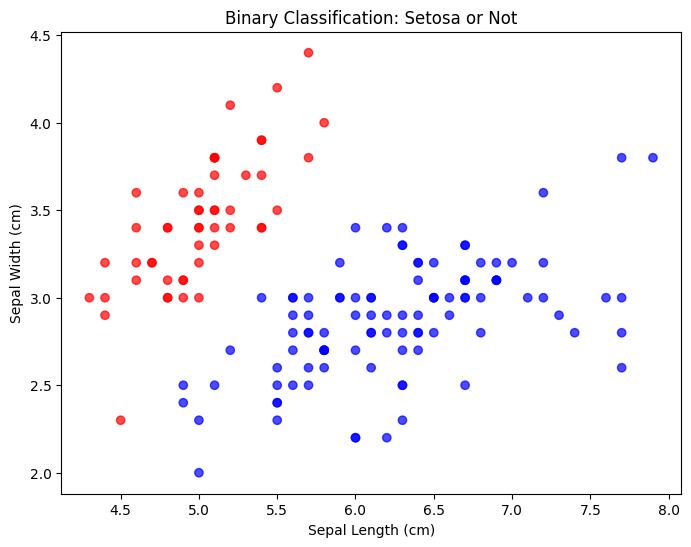

In [16]:
import matplotlib.pyplot as plt

# Two features for visualization (example: sepal length, sepal width)
plt.figure(figsize=(8, 6))
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=y, cmap='bwr', alpha=0.7)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Binary Classification: Setosa or Not")
plt.show()

In [17]:
# 훈련 완료된 모델에서 계수와 절편 확인
print("Coefficients (weights):", model.coef_)
print("Intercept (bias):", model.intercept_)

Coefficients (weights): [[-0.42762216  0.88771927 -2.21471658 -0.91610036]]
Intercept (bias): [6.24415327]


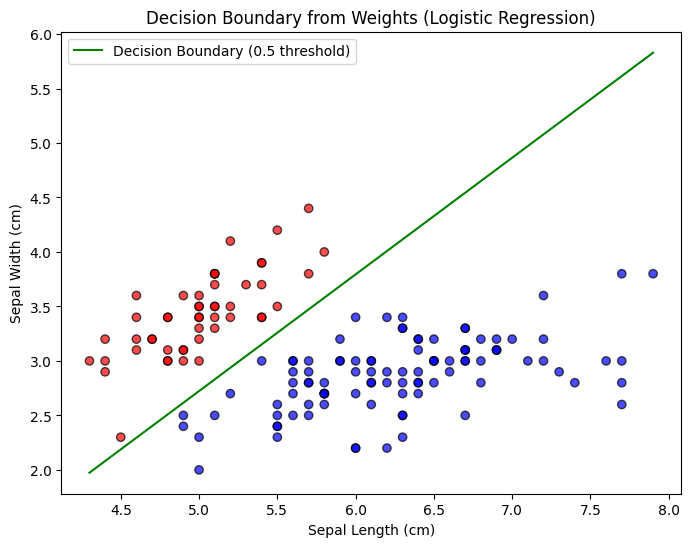

In [18]:
# 두 변수만 선택
X_plot = X[['sepal length (cm)', 'sepal width (cm)']]
y_plot = y

# 모델 훈련
model = LogisticRegression()
model.fit(X_plot, y_plot)

# 계수와 절편
w1, w2 = model.coef_[0]
b = model.intercept_[0]

# 결정 경계 식 정리: x2 = (-w1 * x1 - b) / w2
x1_vals = np.linspace(X_plot['sepal length (cm)'].min(), X_plot['sepal length (cm)'].max(), 100)
x2_vals = (-w1 * x1_vals - b) / w2

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_plot['sepal length (cm)'], X_plot['sepal width (cm)'], c=y_plot, cmap='bwr', edgecolor='k', alpha=0.7)
plt.plot(x1_vals, x2_vals, color='green', label='Decision Boundary (0.5 threshold)')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Decision Boundary from Weights (Logistic Regression)")
plt.legend()
plt.show()